In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [22]:
df = pd.read_csv('calls.csv') #dtype={'Id': str, 'CONTACTID': str})

df.head()

,Id,Call Start Time,Call Owner Name,CONTACTID,Call Type,Call Duration (in seconds),Call Status,Dialled Number,Outgoing Call Status,Scheduled in CRM,Tag
0,5.805028e+18,30.06.2023 08:43,John Doe,NaN,Inbound,171.0,Received,NaN,NaN,NaN,NaN
1,5.805028e+18,30.06.2023 08:46,John Doe,NaN,Outbound,28.0,Attended Dialled,NaN,Completed,False,NaN
2,5.805028e+18,30.06.2023 08:59,John Doe,NaN,Outbound,24.0,Attended Dialled,NaN,Completed,False,NaN
3,5.805028e+18,30.06.2023 09:20,John Doe,5.805028e+18,Outbound,6.0,Attended Dialled,NaN,Completed,False,NaN
4,5.805028e+18,30.06.2023 09:30,John Doe,5.805028e+18,Outbound,11.0,Attended Dialled,NaN,Completed,False,NaN


In [23]:
df['Call Duration (in seconds)'].sum()

15803337.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95874 entries, 0 to 95873
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          95874 non-null  float64
 1   Call Start Time             95874 non-null  object 
 2   Call Owner Name             95874 non-null  object 
 3   CONTACTID                   91941 non-null  float64
 4   Call Type                   95874 non-null  object 
 5   Call Duration (in seconds)  95791 non-null  float64
 6   Call Status                 95874 non-null  object 
 7   Dialled Number              0 non-null      float64
 8   Outgoing Call Status        86875 non-null  object 
 9   Scheduled in CRM            86875 non-null  object 
 10  Tag                         0 non-null      float64
dtypes: float64(5), object(6)
memory usage: 8.0+ MB


In [5]:
df.describe()

,Id,CONTACTID,Call Duration (in seconds),Dialled Number,Tag
count,9.587400e+04,9.194100e+04,95791.000000,0.0,0.0
mean,5.805028e+18,5.805028e+18,164.977263,NaN,NaN
std,1.118740e+10,1.570462e+07,401.410826,NaN,NaN
min,5.805028e+18,5.805028e+18,0.000000,NaN,NaN
25%,5.805028e+18,5.805028e+18,4.000000,NaN,NaN
50%,5.805028e+18,5.805028e+18,8.000000,NaN,NaN
75%,5.805028e+18,5.805028e+18,98.000000,NaN,NaN
max,5.805030e+18,5.805028e+18,7625.000000,NaN,NaN


In [6]:
df['Id'] = df['Id'].apply(lambda x: '{:.0f}'.format(float(x)))
df['CONTACTID'] = df['CONTACTID'].apply(lambda x: '{:.0f}'.format(float(x)) if pd.notna(x) else x)

print(df[['Id', 'CONTACTID']].head())

                    Id            CONTACTID
0  5805028000000804864                  NaN
1  5805028000000768000                  NaN
2  5805028000000763904                  NaN
3  5805028000000787456  5805028000000645120
4  5805028000000768000  5805028000000645120


In [7]:
text_columns_df = df.select_dtypes(include=['object'])

text_columns_df.describe()

,Id,Call Start Time,Call Owner Name,CONTACTID,Call Type,Call Status,Outgoing Call Status,Scheduled in CRM
count,95874,95874,95874,91941,95874,95874,86875,86875
unique,10914,68445,33,7556,3,11,4,2
top,5805028000050017280,06.06.2024 15:07,Yara Edwards,5805028000001880064,Outbound,Attended Dialled,Completed,False
freq,62,9,9059,113,86875,70703,86792,86733


In [8]:
df.dtypes

Id                             object
Call Start Time                object
Call Owner Name                object
CONTACTID                      object
Call Type                      object
Call Duration (in seconds)    float64
Call Status                    object
Dialled Number                float64
Outgoing Call Status           object
Scheduled in CRM               object
Tag                           float64
dtype: object

In [9]:
df.drop(['Dialled Number', 'Tag'], axis=1, inplace=True)
df.head()

,Id,Call Start Time,Call Owner Name,CONTACTID,Call Type,Call Duration (in seconds),Call Status,Outgoing Call Status,Scheduled in CRM
0,5805028000000804864,30.06.2023 08:43,John Doe,NaN,Inbound,171.0,Received,NaN,NaN
1,5805028000000768000,30.06.2023 08:46,John Doe,NaN,Outbound,28.0,Attended Dialled,Completed,False
2,5805028000000763904,30.06.2023 08:59,John Doe,NaN,Outbound,24.0,Attended Dialled,Completed,False
3,5805028000000787456,30.06.2023 09:20,John Doe,5805028000000645120,Outbound,6.0,Attended Dialled,Completed,False
4,5805028000000768000,30.06.2023 09:30,John Doe,5805028000000645120,Outbound,11.0,Attended Dialled,Completed,False


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95874 entries, 0 to 95873
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          95874 non-null  object 
 1   Call Start Time             95874 non-null  object 
 2   Call Owner Name             95874 non-null  object 
 3   CONTACTID                   91941 non-null  object 
 4   Call Type                   95874 non-null  object 
 5   Call Duration (in seconds)  95791 non-null  float64
 6   Call Status                 95874 non-null  object 
 7   Outgoing Call Status        86875 non-null  object 
 8   Scheduled in CRM            86875 non-null  object 
dtypes: float64(1), object(8)
memory usage: 6.6+ MB


In [11]:
df.duplicated(subset=[ 'Call Start Time', 'Call Owner Name', 'CONTACTID', 'Call Type', 'Call Duration (in seconds)', 'Call Status', 
                      'Outgoing Call Status', 'Scheduled in CRM'], keep=False)

0        False
1        False
2        False
3        False
4        False
         ...  
95869    False
95870    False
95871    False
95872    False
95873    False
Length: 95874, dtype: bool

In [12]:
df.loc[df.duplicated(subset=['Call Start Time', 'Call Owner Name', 'CONTACTID', 'Call Type', 'Call Duration (in seconds)', 'Call Status', 
                      'Outgoing Call Status', 'Scheduled in CRM'], keep=False)]

,Id,Call Start Time,Call Owner Name,CONTACTID,Call Type,Call Duration (in seconds),Call Status,Outgoing Call Status,Scheduled in CRM
34,5805028000001139712,06.07.2023 17:15,Alice Johnson,5805028000001129472,Outbound,0.0,Unattended Dialled,Completed,False
35,5805028000001167360,06.07.2023 17:15,Alice Johnson,5805028000001129472,Outbound,0.0,Unattended Dialled,Completed,False
101,5805028000001372160,08.07.2023 16:43,John Doe,NaN,Missed,0.0,Missed,NaN,NaN
102,5805028000001347584,08.07.2023 16:43,John Doe,NaN,Missed,0.0,Missed,NaN,NaN
254,5805028000001567744,12.07.2023 19:23,Jane Smith,5805028000001552384,Outbound,0.0,Unattended Dialled,Completed,False
...,...,...,...,...,...,...,...,...,...
95804,5805028000056832000,21.06.2024 14:17,Yara Edwards,NaN,Outbound,8.0,Attended Dialled,Completed,False
95833,5805028000056845312,21.06.2024 14:47,Ulysses Adams,5805028000026041344,Outbound,0.0,Unattended Dialled,Completed,False
95834,5805028000056873984,21.06.2024 14:47,Ulysses Adams,5805028000026041344,Outbound,0.0,Unattended Dialled,Completed,False
95838,5805028000056834048,21.06.2024 14:55,John Doe,NaN,Missed,0.0,Missed,NaN,NaN


In [13]:
df.count()

Id                            95874
Call Start Time               95874
Call Owner Name               95874
CONTACTID                     91941
Call Type                     95874
Call Duration (in seconds)    95791
Call Status                   95874
Outgoing Call Status          86875
Scheduled in CRM              86875
dtype: int64

In [14]:
df = df.drop_duplicates(subset=['Call Start Time', 'Call Owner Name', 'CONTACTID', 'Call Type', 'Call Duration (in seconds)', 'Call Status', 
                      'Outgoing Call Status', 'Scheduled in CRM'], keep=False)

In [15]:
df.count()

Id                            89487
Call Start Time               89487
Call Owner Name               89487
CONTACTID                     85811
Call Type                     89487
Call Duration (in seconds)    89412
Call Status                   89487
Outgoing Call Status          80853
Scheduled in CRM              80853
dtype: int64

In [16]:
df.loc[df.duplicated(subset=['Id', 'Call Start Time', 'Call Owner Name', 'CONTACTID', 'Call Type', 'Call Duration (in seconds)', 'Call Status', 
                      'Outgoing Call Status', 'Scheduled in CRM'], keep=False)]

,Id,Call Start Time,Call Owner Name,CONTACTID,Call Type,Call Duration (in seconds),Call Status,Outgoing Call Status,Scheduled in CRM


In [17]:
df.isnull().sum()

Id                               0
Call Start Time                  0
Call Owner Name                  0
CONTACTID                     3676
Call Type                        0
Call Duration (in seconds)      75
Call Status                      0
Outgoing Call Status          8634
Scheduled in CRM              8634
dtype: int64

In [ ]:
df['Call Start Time'] = pd.to_datetime(df['Call Start Time'], format='%d.%m.%Y %H:%M', errors='coerce')

# Force set data type
df = df.astype({'Call Start Time': 'datetime64[ns]'})

In [19]:
percent_missing = (df.isnull().sum() / df.shape[0] * 100).round(2)
percent_missing_with_sign = percent_missing.apply(lambda x: f"{x}%")
output = f"\n{percent_missing_with_sign.to_string()}"
print(output)


Id                             0.0%
Call Start Time                0.0%
Call Owner Name                0.0%
CONTACTID                     4.11%
Call Type                      0.0%
Call Duration (in seconds)    0.08%
Call Status                    0.0%
Outgoing Call Status          9.65%
Scheduled in CRM              9.65%


In [20]:
df['Call Duration (in seconds)'].sum()

15720787.0

In [88]:
df.to_pickle('Cals.pkl')

In [89]:
df_new = pd.read_pickle('Cals.pkl')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89487 entries, 0 to 95873
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Id                          89487 non-null  object        
 1   Call Start Time             89487 non-null  datetime64[ns]
 2   Call Owner Name             89487 non-null  object        
 3   CONTACTID                   85811 non-null  object        
 4   Call Type                   89487 non-null  object        
 5   Call Duration (in seconds)  89412 non-null  float64       
 6   Call Status                 89487 non-null  object        
 7   Outgoing Call Status        80853 non-null  object        
 8   Scheduled in CRM            80853 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 6.8+ MB


In [91]:
df_new.describe()

,Call Start Time,Call Duration (in seconds)
count,89487,89412.000000
mean,2024-02-04 01:38:27.060243200,175.824129
min,2023-06-30 08:43:00,0.000000
25%,2023-11-23 12:05:30,4.000000
50%,2024-02-15 11:36:00,9.000000
75%,2024-04-22 09:30:30,117.000000
max,2024-06-21 15:31:00,7625.000000
std,NaN,412.481306


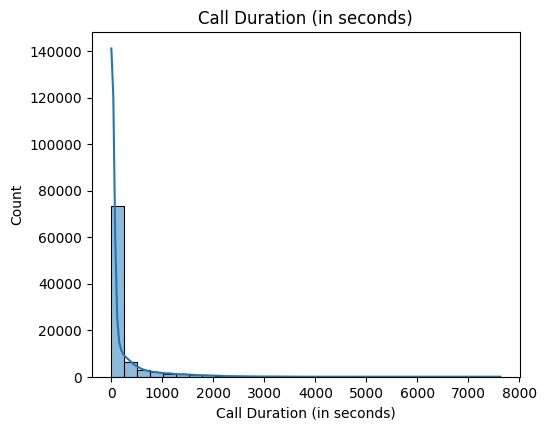

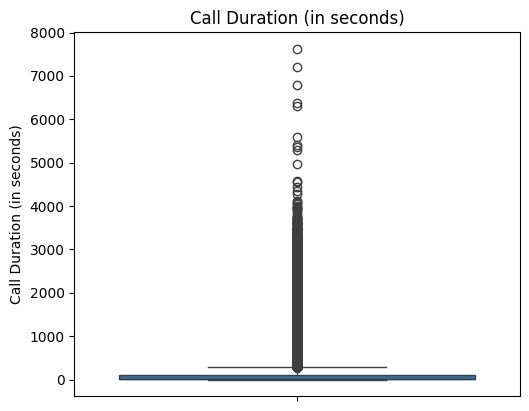

       Call Duration (in seconds)
count                89412.000000
mean                   175.824129
std                    412.481306
min                      0.000000
25%                      4.000000
50%                      9.000000
75%                    117.000000
max                   7625.000000


In [ ]:
# Select only numeric columns
numeric_columns = df_new.select_dtypes(include=['float64', 'int64']).columns

# Visualization of histograms and KDE
plt.figure(figsize=(10, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)  # Changed to 2 rows and 2 columns, as we have 2 numeric fields
    sns.histplot(df_new[col].dropna(), kde=True, bins=30)
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

# Visualization of boxplots to detect outliers
plt.figure(figsize=(10, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_new[col].dropna())
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

# Calculation of descriptive statistics for numeric fields
descriptions = df_new[numeric_columns].describe()
print(descriptions)


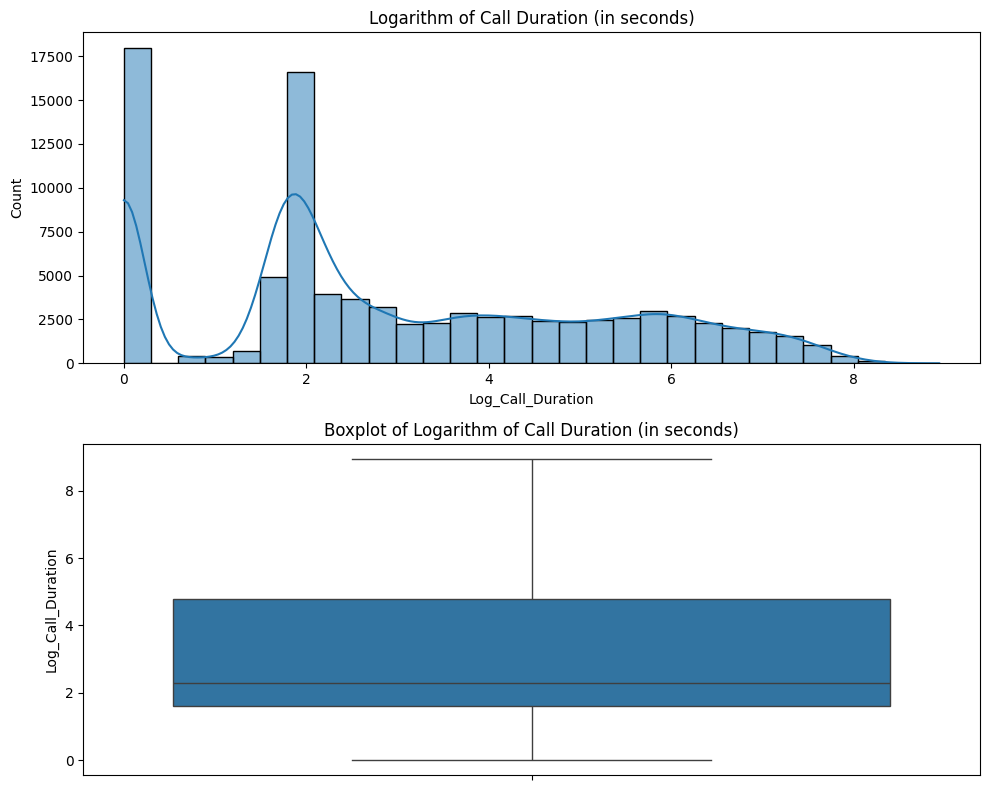

count    89412.000000
mean         2.958297
std          2.246460
min          0.000000
25%          1.609438
50%          2.302585
75%          4.770685
max          8.939319
Name: Log_Call_Duration, dtype: float64


In [ ]:
# Logarithm transformation of the Call Duration (in seconds) column
df_new['Log_Call_Duration'] = np.log1p(df_new['Call Duration (in seconds)'])

# Visualization of the distribution after logarithm transformation
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
sns.histplot(df_new['Log_Call_Duration'].dropna(), kde=True, bins=30)
plt.title('Logarithm of Call Duration (in seconds)')

plt.subplot(2, 1, 2)
sns.boxplot(y=df_new['Log_Call_Duration'].dropna())
plt.title('Boxplot of Logarithm of Call Duration (in seconds)')
plt.tight_layout()
plt.show()

# Descriptive statistics for the log-transformed data
log_descriptions = df_new['Log_Call_Duration'].describe()
print(log_descriptions)


In [ ]:
# Set boundaries for grouping by call duration
bins_original = [0, 30, 100, 1000, 2500, 7625]  # Grouping based on call duration in seconds
df_new['Call Duration Group'] = pd.cut(df_new['Call Duration (in seconds)'], bins=bins_original)

# Logarithmic boundaries for the same groups
bins_log = np.log1p(bins_original)  # Apply logarithm transformation to group boundaries
df_new['Log Call Duration Group'] = pd.cut(df_new['Log_Call_Duration'], bins=bins_log)

grouped_counts_single = df_new.groupby('Call Duration Group').agg(
    Log_Duration_Group=('Log Call Duration Group', 'first'),  # Take logarithmic value for the group
    Count=('Call Duration (in seconds)', 'count')  # Count the number of calls in each group
).reset_index()

# Display the table in the console
grouped_counts_single

/var/folders/3f/yr1j00f96tn08rvm88vpmbsw0000gn/T/ipykernel_6236/1140054226.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts_single = df_new.groupby('Call Duration Group').agg(


,Call Duration Group,Log_Duration_Group,Count
0,"(0, 30]","(0.0, 3.434]",37422
1,"(30, 100]","(3.434, 4.615]",10430
2,"(100, 1000]","(4.615, 6.909]",18930
3,"(1000, 2500]","(6.909, 7.824]",4287
4,"(2500, 7625]","(7.824, 8.939]",382


## Conclusions
Mean and Median:

The mean of the log-transformed data is approximately 2.96, which corresponds to about 19.2 seconds in the original scale.
Median: ~2.30, equivalent to around 10 seconds. This suggests that a significant portion of calls lasts around 10-20 seconds.
Outliers:

After logarithm transformation, a considerable number of outliers became less noticeable. The data range has compressed, making it easier to interpret in the logarithmic scale.
Distribution:

The histogram shows that after log transformation, the data became more evenly distributed, and the peak near 0 (corresponding to short calls) became less extreme.

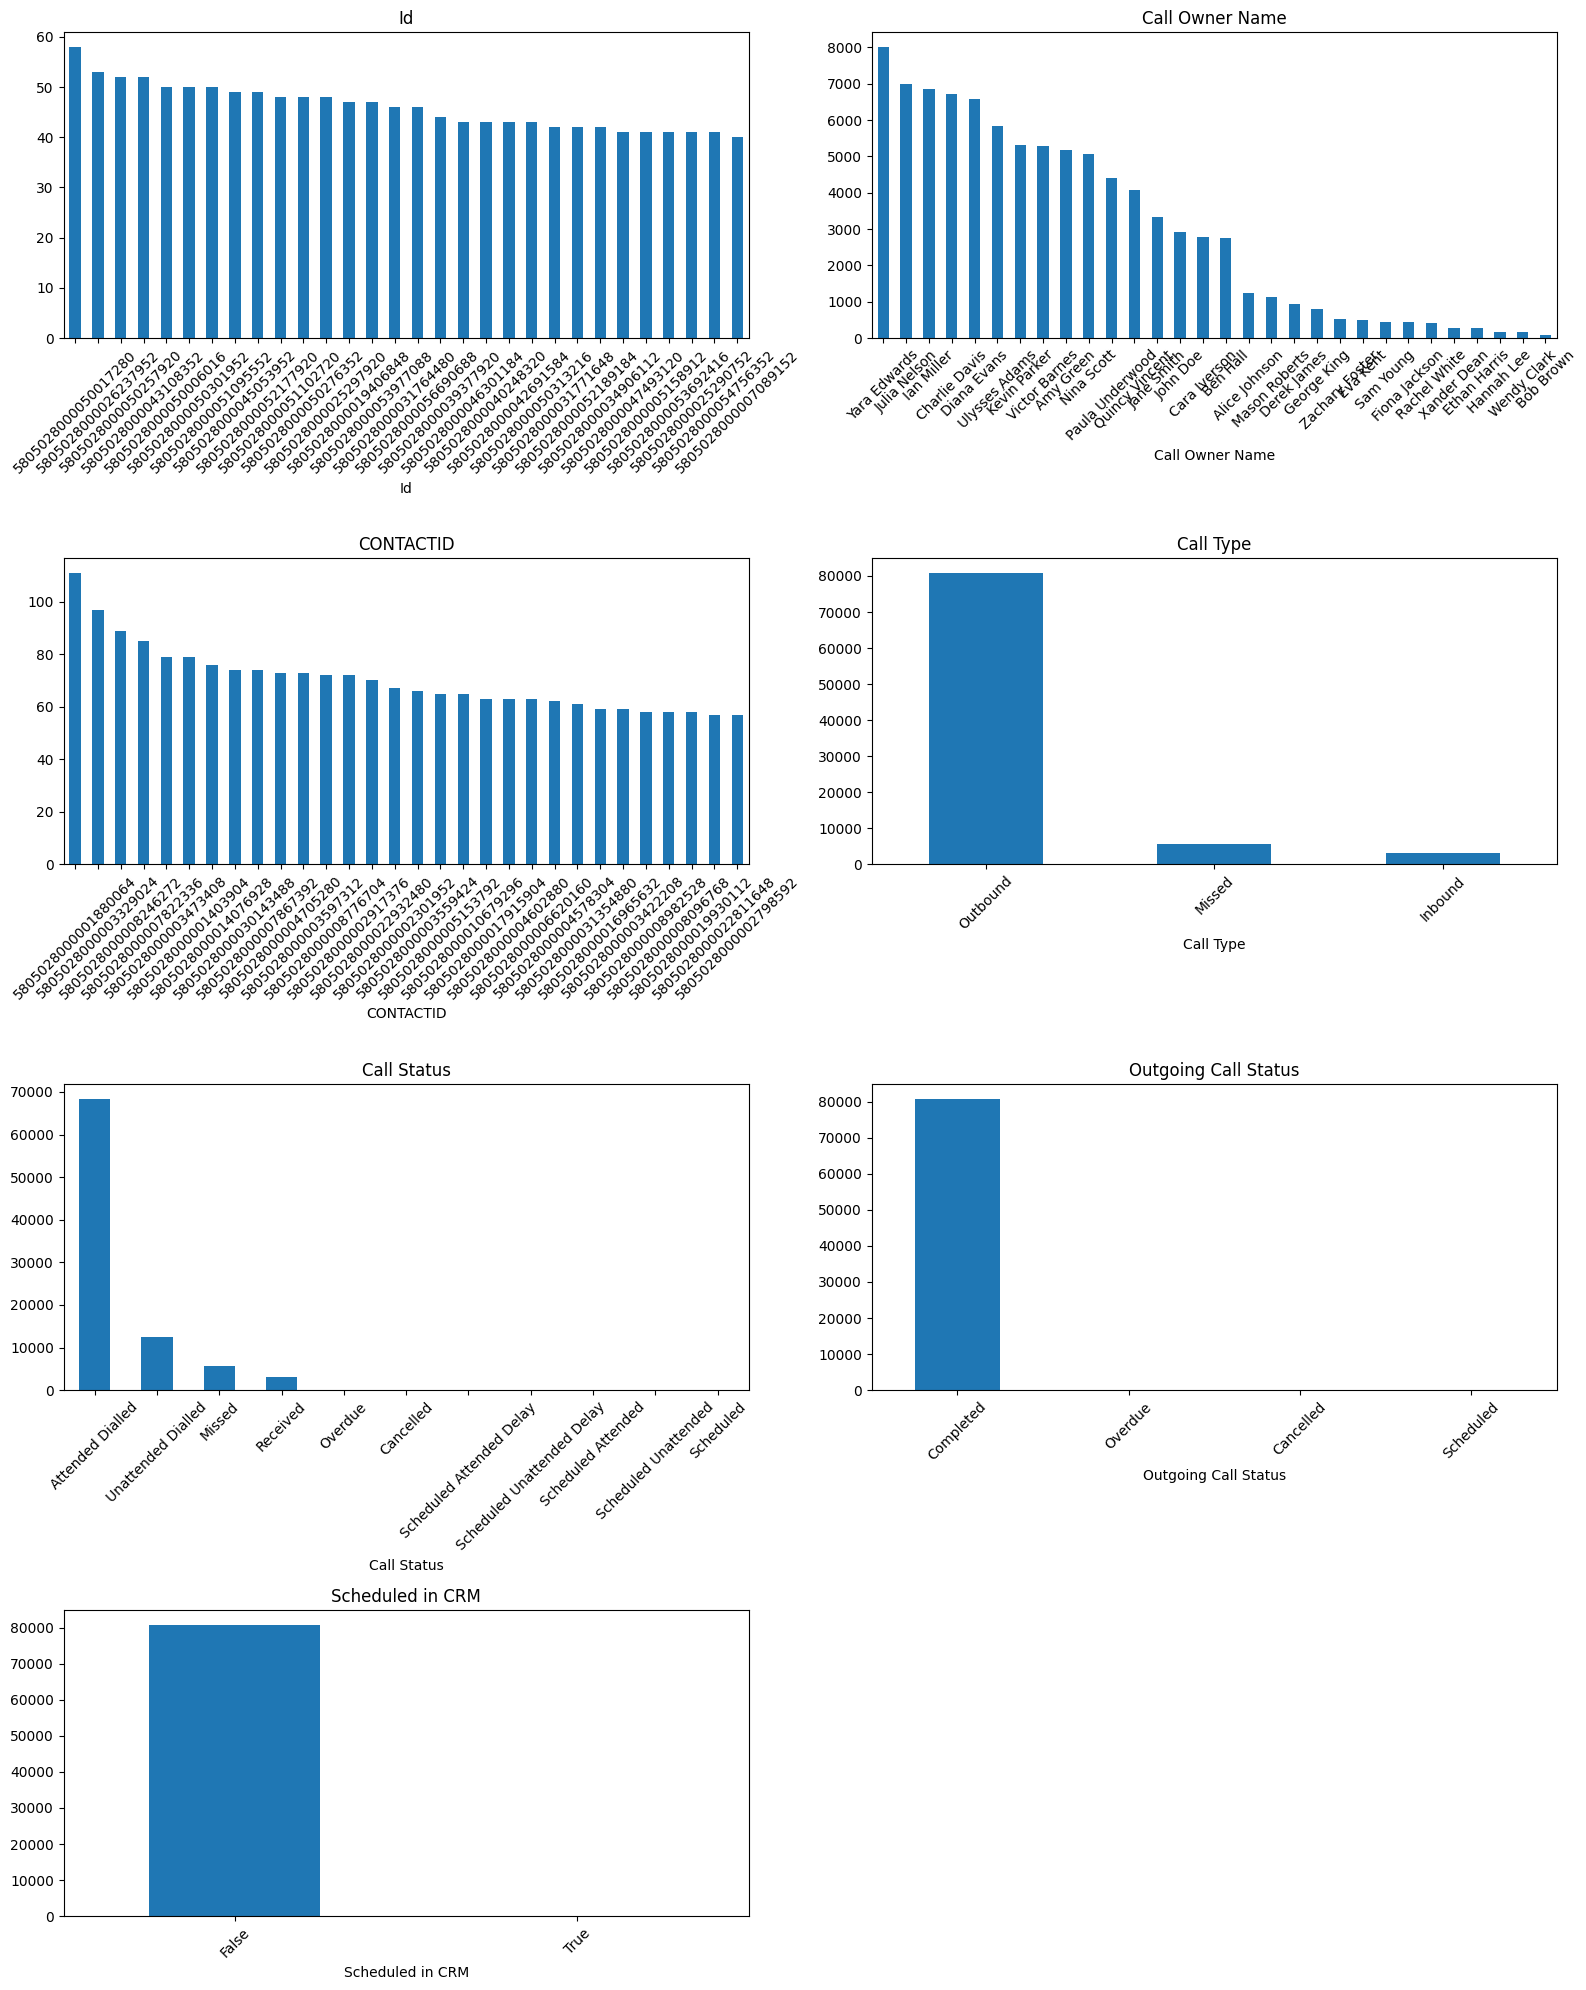

In [ ]:
# Select only categorical columns
categorical_columns = df_new.select_dtypes(include=['object']).columns

# Number of rows and columns for plots
num_cols = len(categorical_columns)
num_rows = (num_cols + 1) // 2  

# Visualization of categorical data distribution
plt.figure(figsize=(16, num_rows * 5))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, 2, i)
    
    # Visualize only the top 30 values if there are too many
    df_new[col].value_counts().head(30).plot(kind='bar')
    
    plt.title(f'{col}')  
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusions
Call Status:

The majority of calls have the status "Attended Dialed" (attended calls).
Other statuses, such as "Missed" and "Received," make up a small portion. This is a typical distribution for such data, where most calls are outgoing and completed.
Outgoing Call Status:

Nearly all calls have the status "Completed." Other statuses, such as "Overdue" and "Cancelled," are barely represented, indicating that most calls are successfully completed.
Scheduled in CRM:

Almost all values are "False," meaning that the majority of calls are not scheduled in the CRM. This is expected, as this is a call log table, not a scheduling table.
Call Type:

The primary type of calls is "Outbound." Other types (e.g., "Missed" and "Inbound") occupy a minimal share.
Call Owner Name:

There is a relatively even distribution among call owners, with slight variations, which also appears normal.
CONTACTID and Id:

The columns with data identifiers show a high level of diversity, indicating a large number of unique contact and call IDs.

In [104]:
df_new.head(1)

,Id,Call Start Time,Call Owner Name,CONTACTID,Call Type,Call Duration (in seconds),Call Status,Outgoing Call Status,Scheduled in CRM,Log_Call_Duration,Call Duration Group,Log Call Duration Group
0,5805028000000804864,2023-06-30 08:43:00,John Doe,NaN,Inbound,171.0,Received,NaN,NaN,5.147494,"(100, 1000]","(4.615, 6.909]"


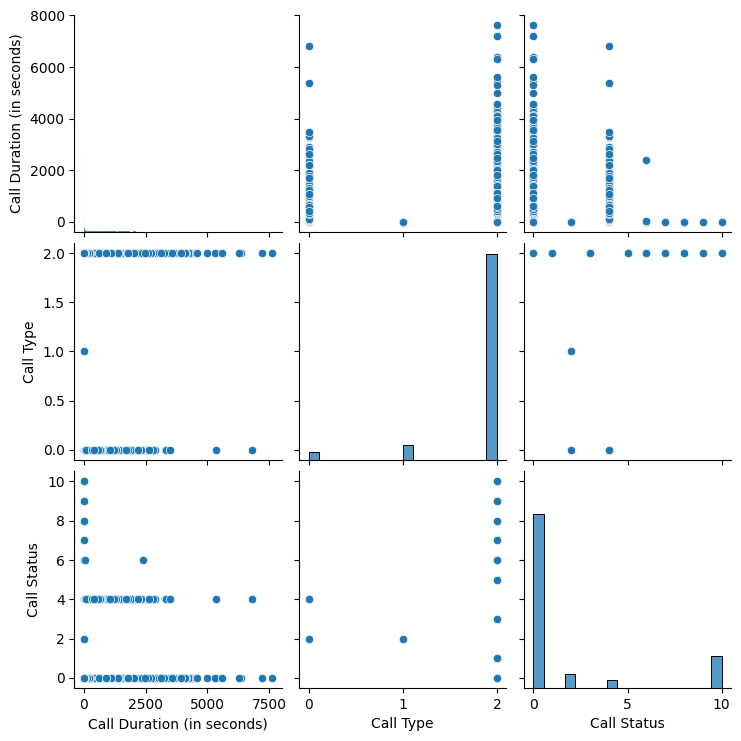

In [ ]:
# Copy the dataframe for encoding categorical data
df_encoded = df_new.copy()

# Encode categorical variables
label_encoder = LabelEncoder()
df_encoded['Call Type'] = label_encoder.fit_transform(df_encoded['Call Type'])
df_encoded['Call Status'] = label_encoder.fit_transform(df_encoded['Call Status'])

# Select encoded columns for pairplot
selected_columns = ['Call Duration (in seconds)', 'Call Type', 'Call Status']

# Plot pairplot for numerical and encoded categorical data
sns.pairplot(df_encoded[selected_columns])
plt.show()

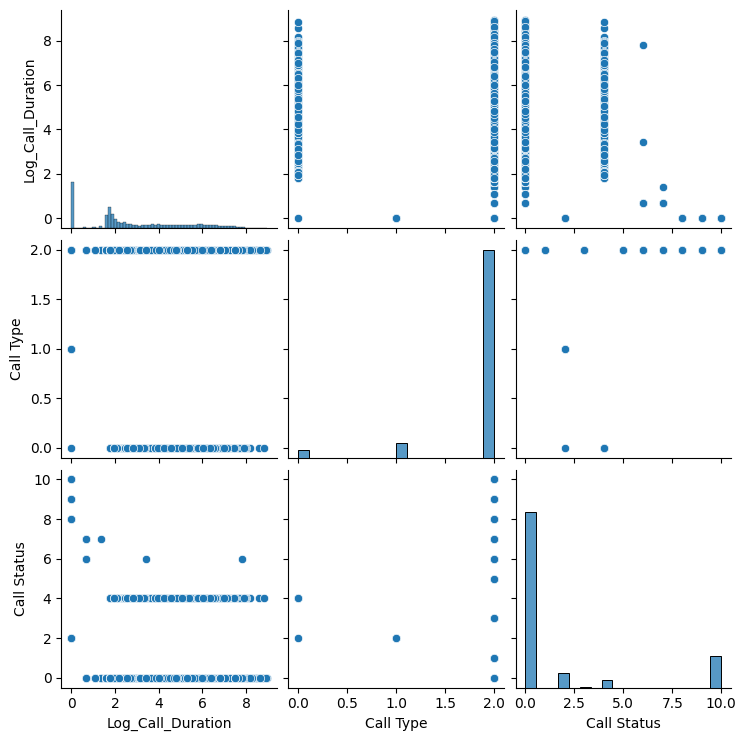

In [ ]:
# Copy the dataframe for encoding categorical data
df_encoded = df_new.copy()

# Encode categorical variables
label_encoder = LabelEncoder()
df_encoded['Call Type'] = label_encoder.fit_transform(df_encoded['Call Type'])
df_encoded['Call Status'] = label_encoder.fit_transform(df_encoded['Call Status'])

# Select encoded columns for pairplot
selected_columns = ['Log_Call_Duration', 'Call Type', 'Call Status']

# Plot pairplot for numerical and encoded categorical data
sns.pairplot(df_encoded[selected_columns])
plt.show()

## Выводы

Между продолжительностью звонков и категориями (типы и статусы) не наблюдается значительных зависимостей. Большая часть звонков имеет определенные типы и статусы, независимо от продолжительности.

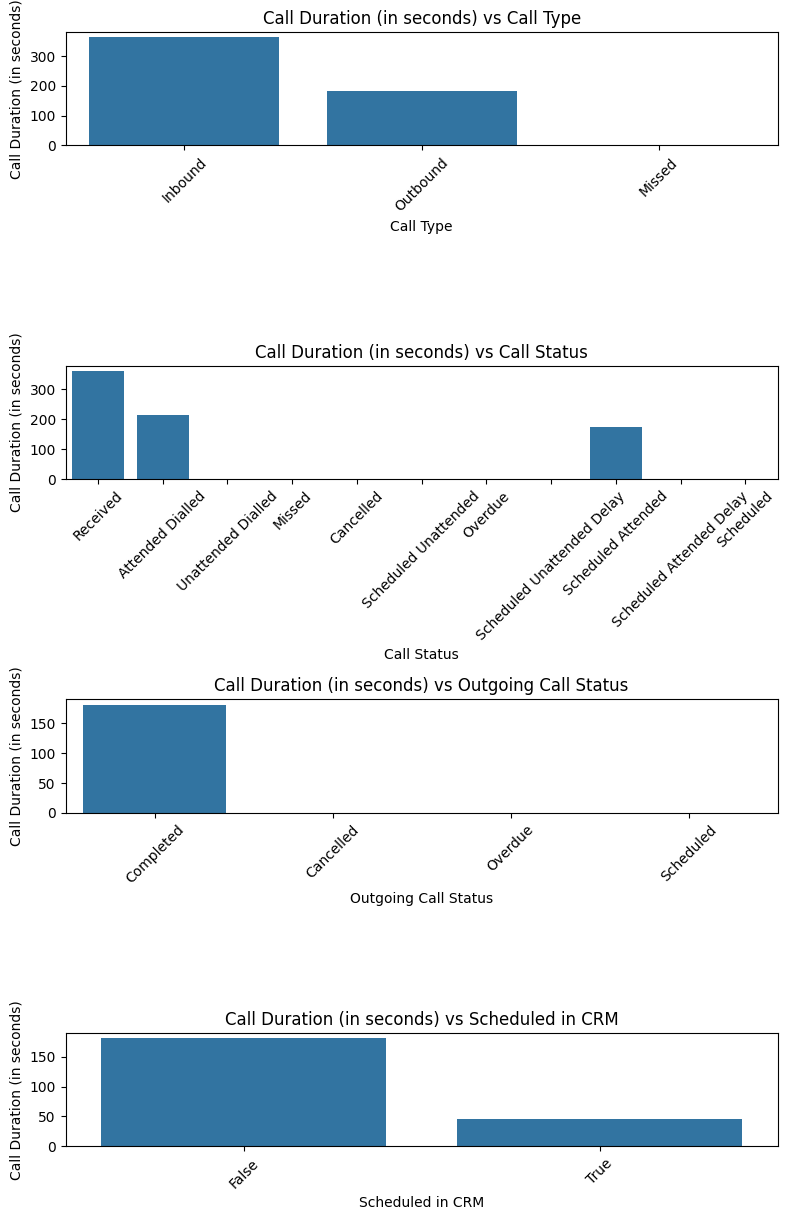

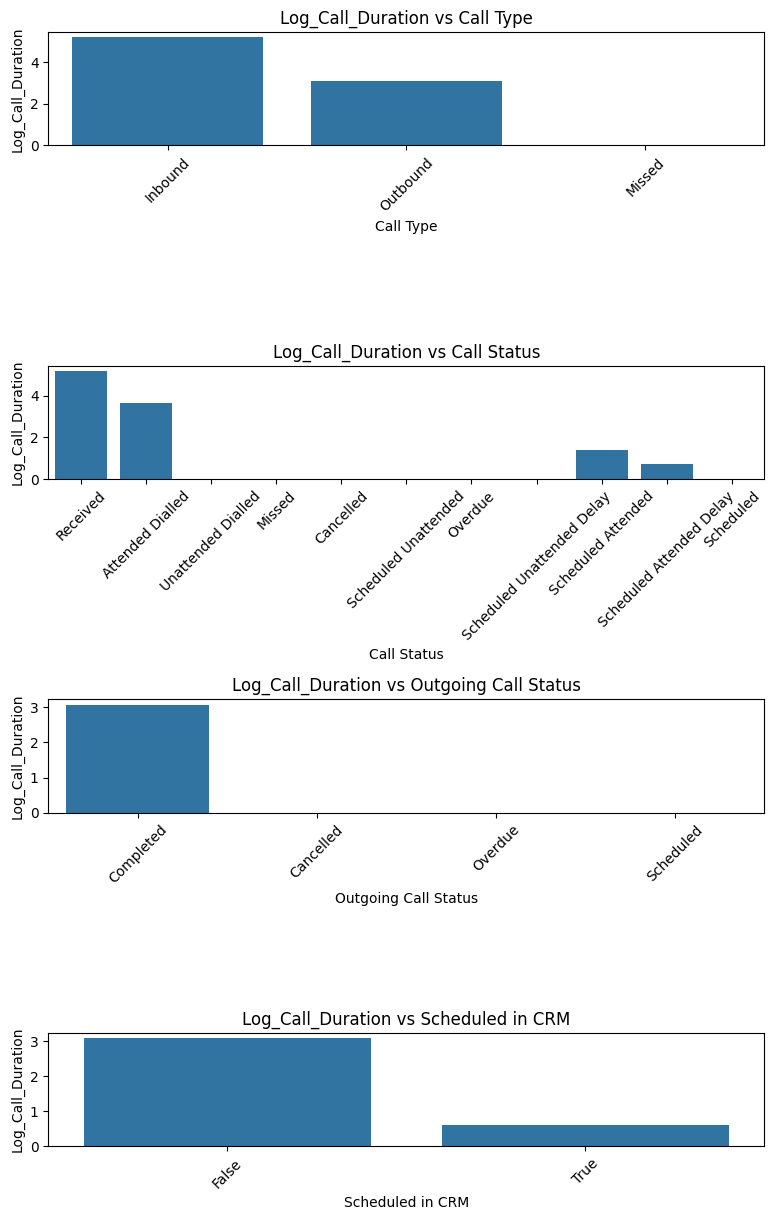

In [ ]:
# Select categorical columns
selected_categorical_columns = ['Call Type', 'Call Status', 'Outgoing Call Status', 'Scheduled in CRM']

# Plot call duration dependency on categorical variables
plt.figure(figsize=(8, 15))
for i, col in enumerate(selected_categorical_columns, 1):
    plt.subplot(len(selected_categorical_columns) + 1, 1, i)
    sns.barplot(x=col, y='Call Duration (in seconds)', data=df_new, errorbar=None)
    plt.title(f'Call Duration (in seconds) vs {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot log-transformed call duration dependency on categorical variables
plt.figure(figsize=(8, 15))
for i, col in enumerate(selected_categorical_columns, 1):
    plt.subplot(len(selected_categorical_columns) + 1, 1, i)
    sns.barplot(x=col, y='Log_Call_Duration', data=df_new, errorbar=None)
    plt.title(f'Log_Call_Duration vs {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Conclusions
Dependency on Call Status:

Calls with different statuses, such as "Received" and "Attended Dialed," show variations in duration. Received calls are generally longer on average than other types of calls.
For log-transformed duration, different statuses have similar trends, but "Received" calls remain the longest.
Dependency on Call Type:

Inbound calls are generally longer than outbound calls, which is evident in both the original and log-transformed data. Missed calls, as expected, have minimal duration.
Log transformation further emphasizes this finding, making the differences even more pronounced.
Outgoing Call Status:

Most calls have the status "Completed," and their duration is higher than other statuses, such as "Cancelled" and "Overdue." These categories have fewer data points, which may indicate rare events.

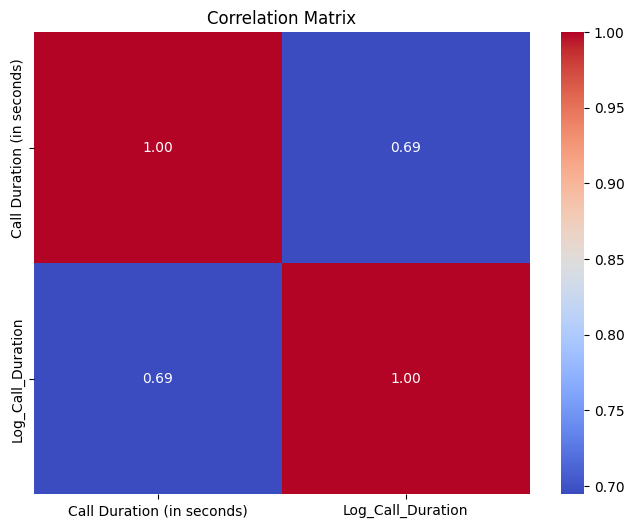

In [ ]:
# Select numerical columns
numerical_columns = df_new.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot the heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()